# Python Bootcamp: Advent of Code (Day 6)

## 1. Puzzle 1

### 1.1 My Solution (before starting on Puzzle 2)

In [1]:
import numpy as np
import time

In [2]:
def find_zero_indices(lst):
    
    if 0 in lst:
        return [idx for idx, ele in enumerate(lst) if ele == 0]
      
    else:
        return None

In [3]:
# Read input file
with open('data/input.txt') as f:
    lines = f.readlines()
    
data = [int(ele) for ele in lines[0].strip().split(',')]
# data = [3, 4, 3, 1, 2] # Example
NUM_DAYS = 80

start = time.time()
for i in range(NUM_DAYS):
    
#     print(f"After {i} days: {data}")
    zero_indices = find_zero_indices(data) # Find indices where there's a 0
    
    if zero_indices is not None:
        data = [num-1 for num in data] # Subtract each element by 1
        data = [6 if ele == -1 else ele for ele in data] # Replace 0 with 6
        data += [8] * len(zero_indices) # Append with 8

    else:
        data = [num-1 for num in data] # Subtract each element by 1
        
# print(f"After {NUM_DAYS} days: {data}")
print(f"Number of fishes: {len(data)}")
print(f"Executed in {round(time.time()-start, 4)} secs.")

Number of fishes: 373378
Executed in 0.5594 secs.


## 2. Puzzle 1 & 2

### 2.2 My Solution (after starting on Puzzle 2)

I must admit that I took guidance from other fellow bootcampers like [@loicteixeira](https://github.com/loicteixeira/coding-challenges/tree/main/advent_of_code_2021/06_lanternfish) as well as Rodrigo's analysis to get some hints and **understand the logic**, before trying to code on my own. 

After understanding the logic, I changed the way I visualise the data. Rather than viewing the data as a **list of fish ages**, each element representing each fish's internal timer, the data is converted to a **list of fishes in each day of life cycle**, where each element is the number of fishes in each day of the life cycle.

So... `[3, 4, 3, 1, 2]` becomes `[0, 1, 1, 2, 1, 0, 0, 0, 0]`. I did the below visualisation for the first few days of the example data.

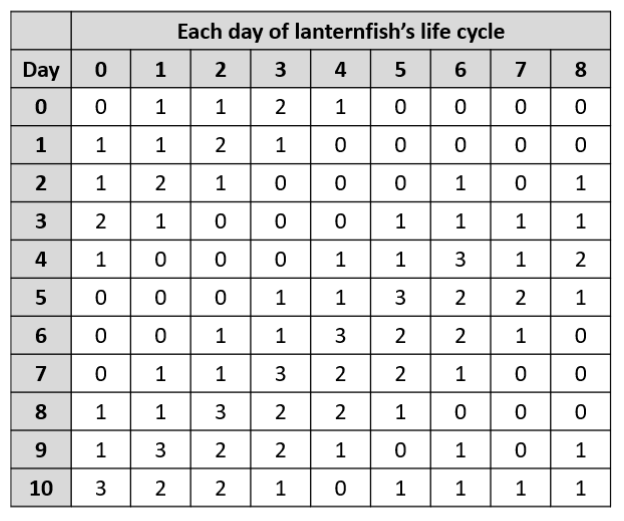

In [4]:
from collections import Counter

def view_as_life_cycle(data):
    """
    Convert original data as list of states at 
    each day of the life cycle.
    """

    population = [0] * 9
    for day, count in Counter(data).items():
        population[day] = count
        
    return population

def get_population_size(data, period=18):
    """
    Determine the total fish population given data 
    in terms of life cycles and number of days.
    """
    population = view_as_life_cycle(data)

    for _ in range(period):
        day_zero = population[0]
        population = population[1:]
        population += [day_zero]
        population[6] += day_zero
    
    return sum(population)

In [5]:
if __name__ == "__main__":
    
    data = [3, 4, 3, 1, 2]
    
    assert get_population_size(data, 18) == 26
    assert get_population_size(data, 80) == 5934    
    assert get_population_size(data, 256) == 26984457539   
    
    with open('data/input.txt') as f:
        data = [int(ele) for ele in f.readlines()[0].strip().split(',')]
        
    NUM_DAYS = 80
    total_pop = get_population_size(data, period=NUM_DAYS)
    print(f"Total population after {NUM_DAYS} days: {total_pop}") 
    
    NUM_DAYS = 256
    total_pop = get_population_size(data, period=NUM_DAYS)
    print(f"Total population after {NUM_DAYS} days: {total_pop}") 

Total population after 80 days: 373378
Total population after 256 days: 1682576647495
